In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split,learning_curve
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,ConfusionMatrixDisplay,f1_score,classification_report

In [3]:
# Load the data.
df = pd.read_csv("labeled_emails.csv")

# Data preprocessing.


In [4]:
df.head()

,email,label
0,Subject: re : rankings\nthank you .,ham
1,"Subject: re : visit to enron\nvince ,\ndec . 2...",ham
2,Subject: research group move to the 19 th floo...,ham
3,Subject: christmas baskets\nthe christmas bask...,ham
4,"Subject: japan candidate\nvince ,\ni spoke wit...",ham


In [5]:
# Checking on the data labels

In [6]:
df.iloc[:,1].unique()

array(['ham', 'spam'], dtype=object)

In [7]:
# Select a random observation to view.
n_mail = 50
df["email"][n_mail]

'Subject: announcing tff 2000\nhappy new year ! just a note to announce the dates for this years texas\nfinance festival . this year we are meeting earlier in april , in san\nantonio , and start the program on friday . please put the date on you\ncalendar and send in your registration forms asap as space at the\nconference is limited . i also encourage you to register with the hotel\nimmediately as we were able to reserve only a limited number of rooms at\nthe reduced conference rate .\nhope to see you all there ! more fun in texas .\njohn\n- announcerev . doc\njohn d . martin\ncarr p . collins chair in finance\nfinance department\nbaylor university\npo box 98004\nwaco , tx 76798\n254 - 710 - 4473 ( office )\n254 - 710 - 1092 ( fax )\nj _ martin @ baylor . edu\nweb : http : / / hsb . baylor . edu / html / martinj / home . html'

In [8]:
# preproessing the words using the nltk
# Downloaded the stopwords package
stop = set(stopwords.words("english"))
print(stop)

{'at', "wouldn't", "shan't", "doesn't", "don't", 'where', 'have', 'm', 'wasn', 'll', 're', 'haven', 'does', 'such', 'how', 'few', "shouldn't", "wasn't", 'who', "you'll", 'me', 'of', 'our', 'herself', 'yourself', 'should', 'all', 'you', 'weren', 'during', 'those', 'they', 't', "mightn't", 'shouldn', 'be', 'until', 'doesn', 'between', 'from', 'wouldn', 'here', 'he', 'nor', 's', 'we', 'these', 'don', 'than', 'if', 'above', 'down', 'themselves', 'been', 'same', 'she', 'own', 'i', 'yourselves', 'your', 'while', 'out', 'ourselves', 'to', 'very', 'having', 'by', 'whom', 'needn', 'up', 'each', 'hers', 'yours', 'him', 'in', 'it', 'about', 'isn', 'just', 'further', 'ours', 'after', 'only', 'd', 'did', 'then', "aren't", 'y', "weren't", "hadn't", 'has', "it's", 'himself', 'their', 'ma', "you're", 'this', "hasn't", "couldn't", "won't", 'there', 'other', "that'll", 'under', 'again', 'not', 'shan', "mustn't", 'won', "didn't", 'an', 'so', 'but', 'over', 'below', 'her', 'which', 'a', "should've", 'or',

# Preprocess text-words message

In [9]:
# Reducing words to their root form
snow = nltk.stem.SnowballStemmer("english")


# Message normalization.

In [10]:
def preprocess_words(sentence):
    # Initialize stemmer and stopwords
    snow = SnowballStemmer("english")
    stop_words = set(stopwords.words("english"))

    # Convert to lowercase
    sentence = sentence.lower()

    # Remove HTML tags
    sentence = re.sub(r"<.*?>", " ", sentence)

    # Replace URLs with a placeholder
    sentence = re.sub(r"(http|https)://\S+", "httpaddr", sentence)

    # Remove specific punctuations (!, ?, ', ", #)
    sentence = re.sub(r"[?|!|'|\"|#]", "", sentence)

    # Replace certain punctuations (., (, ), |, /, :)
    sentence = re.sub(r"[.|,|)|(|\|/|:]", " ", sentence)

    # Replace email addresses with a placeholder
    sentence = re.sub(r"\S+@\S+\.com", "emailaddr", sentence)

    # Replace numeric values with a placeholder
    sentence = re.sub(r"\d+", "number", sentence)

    # Replace dollar signs with a placeholder
    sentence = re.sub(r"[$]+", "dollar", sentence)

    # Remove non-alphanumeric characters (except letters and numbers)
    sentence = re.sub(r"[^a-zA-Z0-9]", " ", sentence)

    # Remove occurrences of the word 'subject'
    sentence = re.sub(r"\bsubject\b", "", sentence)

    # Tokenize, stem, and remove stopwords
    words = [
        snow.stem(word) for word in sentence.split() if word not in stop_words
    ]
    
    return words

In [11]:
# Apply the preprocessing function to the emails
text_list = []
counter = 0

for sentence in df["email"]:
    text_list.append(preprocess_words(sentence))
    counter += 1
    print('\r{}/{}'.format(counter,len(df["email"])),end="")

5854/5854

In [12]:
# Printing the processed emails
print(text_list[n_mail])


['announc', 'tff', 'number', 'happi', 'new', 'year', 'note', 'announc', 'date', 'year', 'texa', 'financ', 'festiv', 'year', 'meet', 'earlier', 'april', 'san', 'antonio', 'start', 'program', 'friday', 'pleas', 'put', 'date', 'calendar', 'send', 'registr', 'form', 'asap', 'space', 'confer', 'limit', 'also', 'encourag', 'regist', 'hotel', 'immedi', 'abl', 'reserv', 'limit', 'number', 'room', 'reduc', 'confer', 'rate', 'hope', 'see', 'fun', 'texa', 'john', 'announcerev', 'doc', 'john', 'martin', 'carr', 'p', 'collin', 'chair', 'financ', 'financ', 'depart', 'baylor', 'univers', 'po', 'box', 'number', 'waco', 'tx', 'number', 'number', 'number', 'number', 'offic', 'number', 'number', 'number', 'fax', 'j', 'martin', 'baylor', 'edu', 'web', 'http', 'hsb', 'baylor', 'edu', 'html', 'martinj', 'home', 'html']


In [13]:
# Preprocess and join the words in each email
email_process = []
counter = 0
for row in text_list:
    sequ = ""
    for word in row:
        sequ = sequ + " " + word
    email_process.append(sequ)
    counter += 1
    print("\r{}/{}".format(counter,len(text_list)),end="")

5854/5854

In [14]:
email_process[n_mail]

' announc tff number happi new year note announc date year texa financ festiv year meet earlier april san antonio start program friday pleas put date calendar send registr form asap space confer limit also encourag regist hotel immedi abl reserv limit number room reduc confer rate hope see fun texa john announcerev doc john martin carr p collin chair financ financ depart baylor univers po box number waco tx number number number number offic number number number fax j martin baylor edu web http hsb baylor edu html martinj home html'

In [15]:
#Print email 20 words per row and count number words
print("Count words in email: {}".format(len(text_list[n_mail])))
print("\nEmail list words:\n")
#Print list words in email
count = 0
for word in text_list[n_mail]:
  print(word,end=' ')
  count += 1
  if count == 20:
    print("")
    count = 0

Count words in email: 91

Email list words:

announc tff number happi new year note announc date year texa financ festiv year meet earlier april san antonio start 
program friday pleas put date calendar send registr form asap space confer limit also encourag regist hotel immedi abl reserv 
limit number room reduc confer rate hope see fun texa john announcerev doc john martin carr p collin chair financ 
financ depart baylor univers po box number waco tx number number number number offic number number number fax j martin 
baylor edu web http hsb baylor edu html martinj home html 

# Tokenization.

In [16]:
#Function to tokenize the emails

def email_tokenization(data, features=500):
  count_vect = CountVectorizer(max_features=features)
  count_matrix = count_vect.fit_transform(data)
  count_array = count_matrix.toarray()
  tokens = pd.DataFrame(data=count_array, columns=count_vect.get_feature_names_out()) 
  vocab = count_vect.vocabulary_
  return (tokens, vocab)


In [17]:
# tokenize the emails
tokens, vocab = email_tokenization(email_process, features=2000)
print(vocab)

{'rank': 1449, 'thank': 1789, 'visit': 1915, 'enron': 571, 'vinc': 1910, 'dec': 440, 'number': 1222, 'fine': 678, 'talk': 1764, 'shirley': 1618, 'direct': 485, 'bob': 192, 'kaminski': 948, 'wrote': 1986, 'come': 325, 'offic': 1235, 'pleas': 1349, 'call': 234, 'crenshaw': 409, 'stinson': 1705, 'gibner': 746, 'recept': 1469, 'build': 221, 'research': 1502, 'group': 774, 'move': 1167, 'th': 1788, 'floor': 690, 'hello': 800, 'case': 259, 'feel': 668, 'box': 200, 'locat': 1036, 'michael': 1136, 'old': 1239, 'desk': 471, 'free': 711, 'take': 1761, 'mani': 1082, 'need': 1192, 'sure': 1750, 'everyth': 609, 'new': 1202, 'file': 672, 'list': 1027, 'eb': 527, 'joseph': 940, 'hrgovcic': 834, 'paulo': 1300, 'issler': 915, 'krishna': 971, 'krishnarao': 972, 'martin': 1097, 'lin': 1022, 'grant': 765, 'masson': 1099, 'kevin': 956, 'moor': 1163, 'maureen': 1109, 'raymond': 1454, 'mike': 1142, 'robert': 1530, 'vasant': 1897, 'shanbhogu': 1607, 'vincent': 1911, 'ravi': 1453, 'thuraisingham': 1801, 'zimin

In [18]:
# Check shape of the tokens
print(tokens.shape)

(5854, 2000)


In [19]:
tokens.head()

,aa,ab,abil,abl,absolut,abstract,academ,accept,access,accomplish,...,yahoo,yaman,year,yes,yesterday,yet,yield,york,young,zimin
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [20]:
# Plot the most common words
tokens.iloc[[n_mail]]

,aa,ab,abil,abl,absolut,abstract,academ,accept,access,accomplish,...,yahoo,yaman,year,yes,yesterday,yet,yield,york,young,zimin
50,0,0,0,1,0,0,0,0,0,0,...,0,0,3,0,0,0,0,0,0,0


# Print token email


In [21]:
for key in text_list[n_mail]:
  if vocab.get(key):
    print(vocab[key], end=" ")

86 1222 789 1202 1992 1215 86 429 1992 1786 675 1992 1120 520 108 1553 1691 1409 715 1349 1432 429 232 1584 1481 699 115 1666 353 1021 65 562 1480 825 857 3 1503 1021 1222 1536 1474 353 1451 822 1576 1786 935 495 935 1097 256 320 276 675 675 460 167 1867 1353 200 1222 1927 1853 1222 1222 1222 1222 1235 1222 1222 1222 660 1097 167 536 1940 838 835 167 536 837 1098 820 837 

In [22]:
#Print token email 20 words per row and count number words
print("Count keys in email: {}".format(len(text_list[n_mail])))
print("\nEmail list keys:\n")
#Print list words in email
count = 0
for key in text_list[n_mail]:
  if vocab.get(key):
    print(vocab[key],end=" ")
    count += 1
  if count == 20:
    print("")
    count = 0

Count keys in email: 91

Email list keys:

86 1222 789 1202 1992 1215 86 429 1992 1786 675 1992 1120 520 108 1553 1691 1409 715 1349 
1432 429 232 1584 1481 699 115 1666 353 1021 65 562 1480 825 857 3 1503 1021 1222 1536 
1474 353 1451 822 1576 1786 935 495 935 1097 256 320 276 675 675 460 167 1867 1353 200 
1222 1927 1853 1222 1222 1222 1222 1235 1222 1222 1222 660 1097 167 536 1940 838 835 167 536 
837 1098 820 837 

# Export process messages and labels

In [23]:
lb = LabelBinarizer()
lb.fit(df["label"])
print(lb.classes_)
y = lb.transform(df["label"])

['ham' 'spam']


In [24]:
# Find the proportion of spam emails in the dataset
print("Spam/Total")
print("{}/{} ".format(int(sum(y)),len(y)))
print("Spam proportion = {:0.2f}".format(int(sum(y))/len(y)))

Spam/Total
1496/5854 
Spam proportion = 0.26


C:\Users\User\AppData\Local\Temp\ipykernel_12296\4228708387.py:3: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("{}/{} ".format(int(sum(y)),len(y)))
C:\Users\User\AppData\Local\Temp\ipykernel_12296\4228708387.py:4: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("Spam proportion = {:0.2f}".format(int(sum(y))/len(y)))


In [25]:
# Export the data
export_data = tokens
export_data["label"] = y
export_data.head()

,aa,ab,abil,abl,absolut,abstract,academ,accept,access,accomplish,...,yaman,year,yes,yesterday,yet,yield,york,young,zimin,label
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [26]:
# Save the data in a csv file
export_data.to_csv("email_tokens.csv", index=False)

# Training the model

In [27]:
df = pd.read_csv("email_tokens.csv")    

In [28]:
df.head()

,aa,ab,abil,abl,absolut,abstract,academ,accept,access,accomplish,...,yaman,year,yes,yesterday,yet,yield,york,young,zimin,label
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Split data into input and target features

In [29]:
X = df.iloc[:,0:-1]
y = df["label"]

In [30]:
# Check the shape of the data
print(X.shape)
print(y.shape)

(5854, 2000)
(5854,)


# Split the data into training and testing set

In [31]:
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.8,random_state=42)

In [32]:
pd.DataFrame([len(X),len(X_train),len(X_test)],
             index=["Total","Train","Test"],
             columns=["Size"])

,Size
Total,5854
Train,4683
Test,1171


In [33]:
# checking the proportion of spam emails in the training set
print("Spam/Total")
print("{}/{} ".format(int(sum(y_train)),len(y_train)))
print("Spam proportion = {:0.2f}".format(int(sum(y_train))/len(y_train)))

Spam/Total
1188/4683 
Spam proportion = 0.25


# Model selection.

In [34]:
gnb = GaussianNB()

# Cross validation

learning curve

In [35]:
# Create a learning curve
train_sizes_fraction = np.arange(0.1,0.85,0.05)
train_sizes = np.array(train_sizes_fraction*len(y_train)).astype(int)
print("Train sizes")
print(train_sizes)

Train sizes
[ 468  702  936 1170 1404 1639 1873 2107 2341 2575 2809 3043 3278 3512
 3746]


In [36]:
# testing the learning curve and get the scores
train_sizes, train_scores, valid_scores = learning_curve(gnb,X_train,y_train, train_sizes=train_sizes.astype(int), cv=5,scoring="f1")

In [37]:
# compute the mean of the scores
cv_results = pd.DataFrame([np.round(train_sizes),np.mean(train_scores,axis=1),np.mean(valid_scores,axis=1)],
             index=['Training size','Training F1-score','CV F1-score']).T
cv_results = cv_results.sort_values(by='CV F1-score', ascending=False)
cv_results

,Training size,Training F1-score,CV F1-score
11,3043.0,0.946906,0.910777
10,2809.0,0.950055,0.910633
13,3512.0,0.945889,0.910436
12,3278.0,0.946444,0.909908
14,3746.0,0.945676,0.909286
9,2575.0,0.950032,0.907576
8,2341.0,0.955636,0.904174
6,1873.0,0.961956,0.899596
7,2107.0,0.957774,0.897489
4,1404.0,0.974263,0.895503


Text(0.5, 1.0, 'Gaussian Naive Bayes')

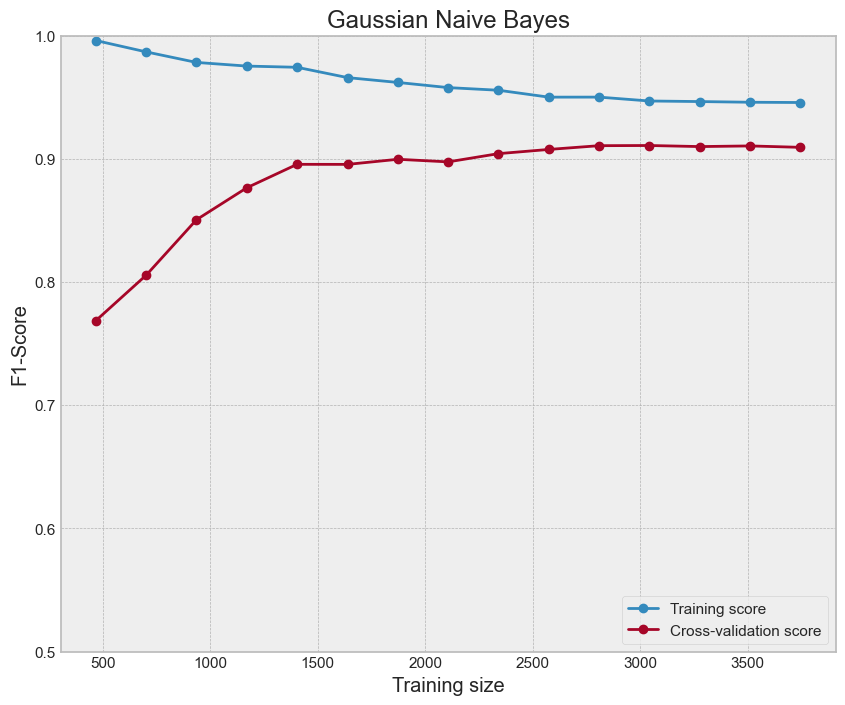

In [38]:
# Plot the learning curve
plt.figure(figsize=(10,8))
plt.style.use("bmh")
plt.plot(train_sizes,np.mean(train_scores,axis=1),"-o",label="Training score",)
plt.plot(train_sizes,np.mean(valid_scores,axis=1),"-o",label="Cross-validation score")
plt.ylim((0.5,1))
plt.legend(loc=4,frameon=True)
plt.xlabel("Training size")
plt.ylabel("F1-Score")
plt.title("Gaussian Naive Bayes")

In [39]:
# Model performance on training set
gnb.fit(X_train,y_train)
print("GNB score: ", f1_score(y_test,gnb.predict(X_test)))

GNB score:  0.9257503949447078


Feature vs performance

1/10

C:\Users\User\AppData\Local\Temp\ipykernel_12296\1175101027.py:49: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  best_models[counter, 1] = cv_results[cv_results["CV scores"] == cv_results["CV scores"].max()]["CV scores"]
C:\Users\User\AppData\Local\Temp\ipykernel_12296\1175101027.py:50: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  best_models[counter, 2] = cv_results[cv_results["CV scores"] == cv_results["CV scores"].max()]["Fit time"]
C:\Users\User\AppData\Local\Temp\ipykernel_12296\1175101027.py:51: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  best_models[counter, 3] = cv_results[cv_results["CV scores"] == cv_results["CV scores"].max()]["Score time"]


2/10

C:\Users\User\AppData\Local\Temp\ipykernel_12296\1175101027.py:49: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  best_models[counter, 1] = cv_results[cv_results["CV scores"] == cv_results["CV scores"].max()]["CV scores"]
C:\Users\User\AppData\Local\Temp\ipykernel_12296\1175101027.py:50: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  best_models[counter, 2] = cv_results[cv_results["CV scores"] == cv_results["CV scores"].max()]["Fit time"]
C:\Users\User\AppData\Local\Temp\ipykernel_12296\1175101027.py:51: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  best_models[counter, 3] = cv_results[cv_results["CV scores"] == cv_results["CV scores"].max()]["Score time"]


3/10

C:\Users\User\AppData\Local\Temp\ipykernel_12296\1175101027.py:49: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  best_models[counter, 1] = cv_results[cv_results["CV scores"] == cv_results["CV scores"].max()]["CV scores"]
C:\Users\User\AppData\Local\Temp\ipykernel_12296\1175101027.py:50: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  best_models[counter, 2] = cv_results[cv_results["CV scores"] == cv_results["CV scores"].max()]["Fit time"]
C:\Users\User\AppData\Local\Temp\ipykernel_12296\1175101027.py:51: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  best_models[counter, 3] = cv_results[cv_results["CV scores"] == cv_results["CV scores"].max()]["Score time"]


4/10

C:\Users\User\AppData\Local\Temp\ipykernel_12296\1175101027.py:49: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  best_models[counter, 1] = cv_results[cv_results["CV scores"] == cv_results["CV scores"].max()]["CV scores"]
C:\Users\User\AppData\Local\Temp\ipykernel_12296\1175101027.py:50: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  best_models[counter, 2] = cv_results[cv_results["CV scores"] == cv_results["CV scores"].max()]["Fit time"]
C:\Users\User\AppData\Local\Temp\ipykernel_12296\1175101027.py:51: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  best_models[counter, 3] = cv_results[cv_results["CV scores"] == cv_results["CV scores"].max()]["Score time"]


5/10

C:\Users\User\AppData\Local\Temp\ipykernel_12296\1175101027.py:49: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  best_models[counter, 1] = cv_results[cv_results["CV scores"] == cv_results["CV scores"].max()]["CV scores"]
C:\Users\User\AppData\Local\Temp\ipykernel_12296\1175101027.py:50: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  best_models[counter, 2] = cv_results[cv_results["CV scores"] == cv_results["CV scores"].max()]["Fit time"]
C:\Users\User\AppData\Local\Temp\ipykernel_12296\1175101027.py:51: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  best_models[counter, 3] = cv_results[cv_results["CV scores"] == cv_results["CV scores"].max()]["Score time"]


6/10

C:\Users\User\AppData\Local\Temp\ipykernel_12296\1175101027.py:49: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  best_models[counter, 1] = cv_results[cv_results["CV scores"] == cv_results["CV scores"].max()]["CV scores"]
C:\Users\User\AppData\Local\Temp\ipykernel_12296\1175101027.py:50: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  best_models[counter, 2] = cv_results[cv_results["CV scores"] == cv_results["CV scores"].max()]["Fit time"]
C:\Users\User\AppData\Local\Temp\ipykernel_12296\1175101027.py:51: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  best_models[counter, 3] = cv_results[cv_results["CV scores"] == cv_results["CV scores"].max()]["Score time"]


7/10

C:\Users\User\AppData\Local\Temp\ipykernel_12296\1175101027.py:49: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  best_models[counter, 1] = cv_results[cv_results["CV scores"] == cv_results["CV scores"].max()]["CV scores"]
C:\Users\User\AppData\Local\Temp\ipykernel_12296\1175101027.py:50: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  best_models[counter, 2] = cv_results[cv_results["CV scores"] == cv_results["CV scores"].max()]["Fit time"]
C:\Users\User\AppData\Local\Temp\ipykernel_12296\1175101027.py:51: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  best_models[counter, 3] = cv_results[cv_results["CV scores"] == cv_results["CV scores"].max()]["Score time"]


8/10

C:\Users\User\AppData\Local\Temp\ipykernel_12296\1175101027.py:49: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  best_models[counter, 1] = cv_results[cv_results["CV scores"] == cv_results["CV scores"].max()]["CV scores"]
C:\Users\User\AppData\Local\Temp\ipykernel_12296\1175101027.py:50: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  best_models[counter, 2] = cv_results[cv_results["CV scores"] == cv_results["CV scores"].max()]["Fit time"]
C:\Users\User\AppData\Local\Temp\ipykernel_12296\1175101027.py:51: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  best_models[counter, 3] = cv_results[cv_results["CV scores"] == cv_results["CV scores"].max()]["Score time"]


9/10

C:\Users\User\AppData\Local\Temp\ipykernel_12296\1175101027.py:49: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  best_models[counter, 1] = cv_results[cv_results["CV scores"] == cv_results["CV scores"].max()]["CV scores"]
C:\Users\User\AppData\Local\Temp\ipykernel_12296\1175101027.py:50: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  best_models[counter, 2] = cv_results[cv_results["CV scores"] == cv_results["CV scores"].max()]["Fit time"]
C:\Users\User\AppData\Local\Temp\ipykernel_12296\1175101027.py:51: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  best_models[counter, 3] = cv_results[cv_results["CV scores"] == cv_results["CV scores"].max()]["Score time"]


10/10

C:\Users\User\AppData\Local\Temp\ipykernel_12296\1175101027.py:49: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  best_models[counter, 1] = cv_results[cv_results["CV scores"] == cv_results["CV scores"].max()]["CV scores"]
C:\Users\User\AppData\Local\Temp\ipykernel_12296\1175101027.py:50: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  best_models[counter, 2] = cv_results[cv_results["CV scores"] == cv_results["CV scores"].max()]["Fit time"]
C:\Users\User\AppData\Local\Temp\ipykernel_12296\1175101027.py:51: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  best_models[counter, 3] = cv_results[cv_results["CV scores"] == cv_results["CV scores"].max()]["Score time"]


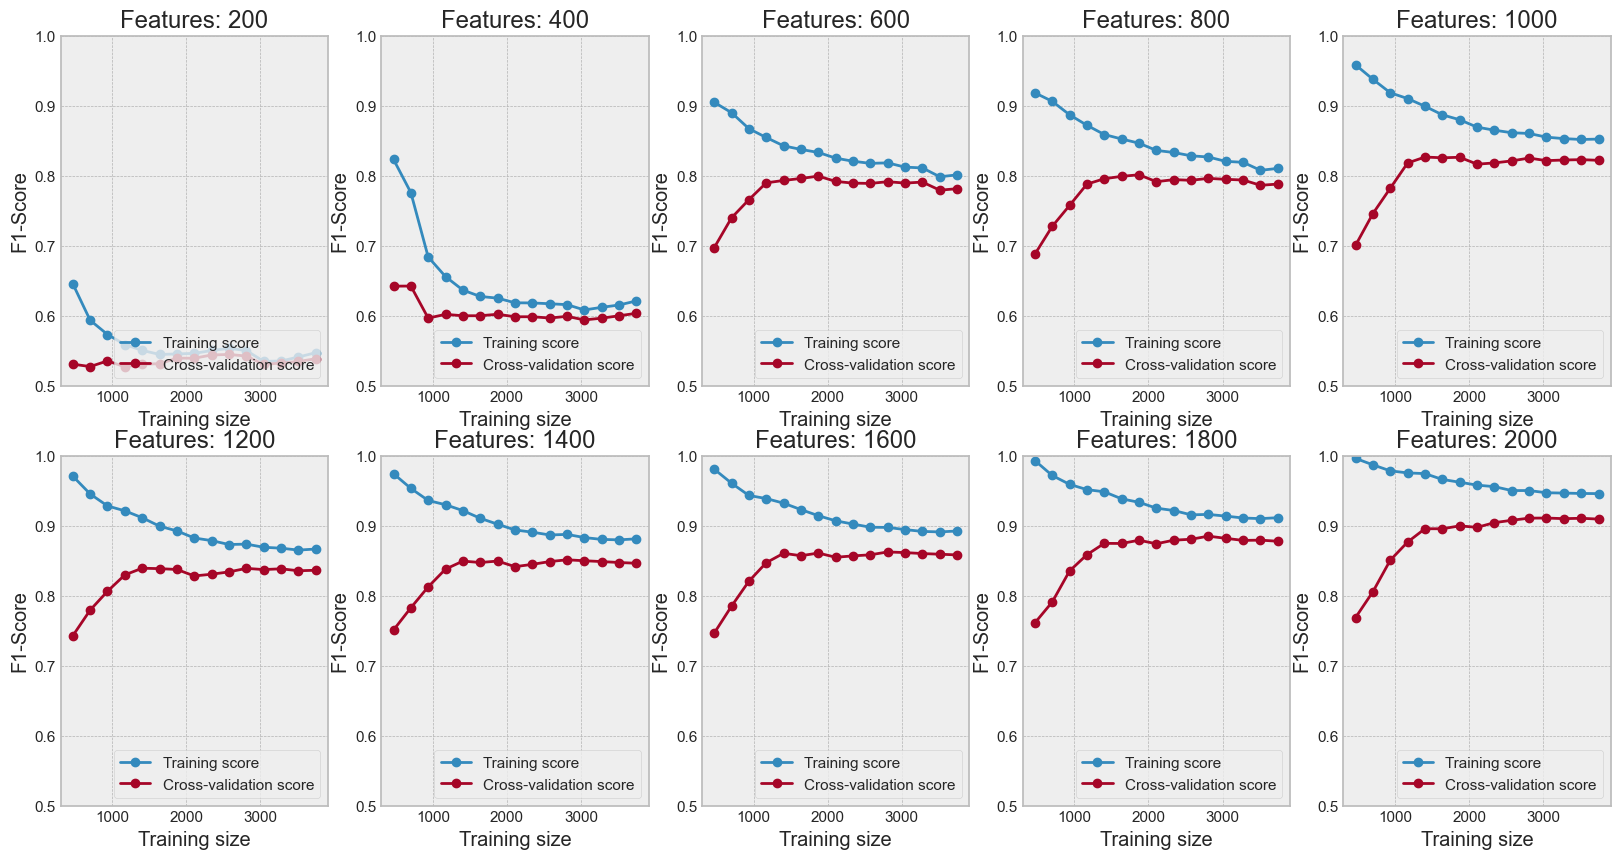

In [40]:
# Defining the range of features to evaluate
iterat = np.arange(200, 2001, 200)
best_models = np.zeros((len(iterat), 4))  
counter = 0  


plt.figure(figsize=(20, 10))
plt.style.use("bmh")

# Looping over different numbers of features to evaluate
for n_features in iterat:
    print(f"\r{counter + 1}/{len(iterat)}", end="")  

    # Cross-validation for the current number of features
    (train_sizes, train_scores, valid_scores, fit_time, score_time) = learning_curve(
        gnb, 
        X_train.iloc[:, 0:n_features], 
        y_train, 
        train_sizes=train_sizes.astype(int), 
        cv=5, 
        scoring="f1", 
        return_times=True
    )
   
    
    cv_results = pd.DataFrame(
        [
            np.round(train_sizes),
            np.mean(train_scores, axis=1),
            np.mean(valid_scores, axis=1),
            np.mean(fit_time, axis=1),
            np.mean(score_time, axis=1)
        ],
        index=["Training size", "Training scores", "CV scores", "Fit time", "Score time"]
    ).T
    
    # Plot the learning curves (Training vs. CV scores)
    plt.subplot(2, 5, counter + 1)
    plt.plot(train_sizes, np.mean(train_scores, axis=1), "-o", label="Training score")
    plt.plot(train_sizes, np.mean(valid_scores, axis=1), "-o", label="Cross-validation score")
    plt.ylim((0.5, 1))
    plt.legend(loc=4, frameon=True)
    plt.xlabel("Training size")
    plt.ylabel("F1-Score")
    plt.title(f"Features: {n_features}")

    # Extract the best cross-validation score and the corresponding fit and score times
    best_models[counter, 0] = n_features
    best_models[counter, 1] = cv_results[cv_results["CV scores"] == cv_results["CV scores"].max()]["CV scores"]
    best_models[counter, 2] = cv_results[cv_results["CV scores"] == cv_results["CV scores"].max()]["Fit time"]
    best_models[counter, 3] = cv_results[cv_results["CV scores"] == cv_results["CV scores"].max()]["Score time"]

    # Increment the counter for the next iteration
    counter += 1

In [41]:
# Display the selected models for each number of features
best_models = pd.DataFrame(best_models,
             columns=["Features","CV F1-scores","Fit time","Score time"])
best_models

,Features,CV F1-scores,Fit time,Score time
0,200.0,0.544458,0.019015,0.011543
1,400.0,0.642208,0.009205,0.015084
2,600.0,0.799239,0.041812,0.025681
3,800.0,0.801165,0.060916,0.030683
4,1000.0,0.826480,0.059064,0.042948
5,1200.0,0.839116,0.097380,0.066255
6,1400.0,0.851115,0.193479,0.081411
7,1600.0,0.862349,0.137830,0.049870
8,1800.0,0.884890,0.161933,0.057313
9,2000.0,0.910777,0.210401,0.056516


Text(0, 0.5, 'Fit time')

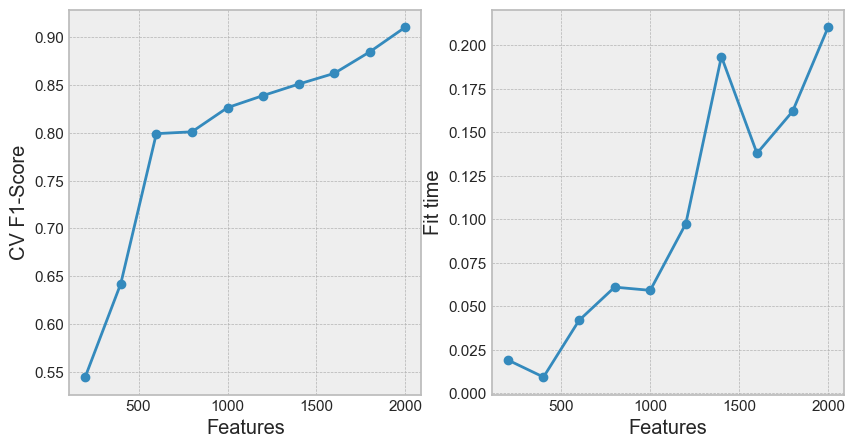

In [42]:
# Plot the best models
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(best_models["Features"],best_models["CV F1-scores"],"-o")
plt.xlabel("Features")
plt.ylabel("CV F1-Score")

plt.subplot(1,2,2)
plt.plot(best_models["Features"],best_models["Fit time"],"-o")
plt.xlabel("Features")
plt.ylabel("Fit time")

Evaluating the best model.

In [43]:
#Training size for best model
X_subtrain, X_cv, y_subtrain, y_cv = train_test_split(X_train,y_train,train_size=0.8)

In [44]:
pd.DataFrame([len(X_train),len(X_subtrain),len(X_cv)],
             index=["Total","Train","Test"],
             columns=["Size"])

,Size
Total,4683
Train,3746
Test,937


In [45]:
print("y-test size: {}".format(len(y_test)))
print("Ham: {}".format(len(y_test)-sum(y_test)))
print("Spam: {}".format(sum(y_test)))

y-test size: 1171
Ham: 863
Spam: 308


In [46]:
gnb.fit(X_train,y_train)

GaussianNB()

In [47]:
predictions = gnb.predict(X_test)

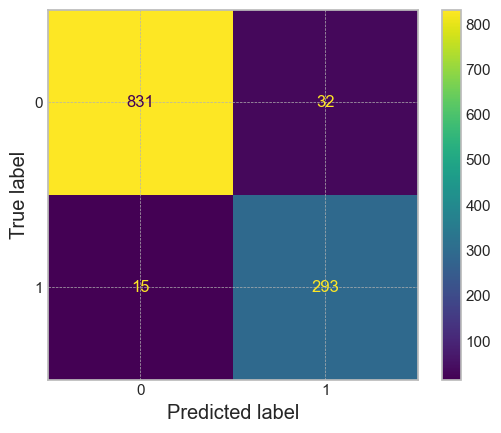

In [48]:
cm = confusion_matrix(y_test, predictions, labels=gnb.classes_);
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=gnb.classes_);
disp.plot()
plt.show()

In [49]:
print('Metrics for best model')
print('Accuracy: {:.2f}%'.format(accuracy_score(y_test,predictions)*100))
print('Precision: {:.2f}%'.format(precision_score(y_test,predictions)*100))
print('Recall: {:.2f}%'.format(recall_score(y_test,predictions)*100))
print('F1 score: {:.2f}%'.format(f1_score(y_test,predictions)*100))

Metrics for best model
Accuracy: 95.99%
Precision: 90.15%
Recall: 95.13%
F1 score: 92.58%


In [51]:
print(classification_report(y_test,predictions,target_names=["ham","spam"]))

              precision    recall  f1-score   support

         ham       0.98      0.96      0.97       863
        spam       0.90      0.95      0.93       308

    accuracy                           0.96      1171
   macro avg       0.94      0.96      0.95      1171
weighted avg       0.96      0.96      0.96      1171



The model performs well in classifying if an email is a spam or not.